# Task 1: Linear Regression with Gradient Descent

Step 1: Import necessary libraries

In [25]:
#This cell imports all the required libraries for numerical operations, data visualization, and plotting
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Step 2: Generate synthetic dataset

In [5]:
#This cell creates the synthetic dataset based on the true relationship y = 2*X + 3 with added noise
np.random.seed(42)  # For reproducible results
X = np.linspace(0, 10, 100)  # Create 100 points between 0 and 10
y_true = 2 * X + 3  # True relationship
y = y_true + np.random.normal(0, 1, 100)  # Add some noise to simulate real data

Step 3: Initialize parameters and set hyperparameters

In [6]:
#This cell initializes the model parameters (w, b) and sets the training hyperparameters
w = 0.5  # Initial weight
b = 0.5  # Initial bias
learning_rate = 0.01
epochs = 100

Step 4: Implement gradient descent algorithm

In [7]:
#This cell implements the gradient descent algorithm to optimize w and b
loss_history = []  # To track loss over epochs
w_history = []     # To track weight changes
b_history = []     # To track bias changes

n = len(X)  # Number of samples

for epoch in range(epochs):
    # Forward pass: compute predictions
    y_pred = w * X + b
    
    # Compute loss (Mean Squared Error)
    loss = (1/n) * np.sum((y_pred - y) ** 2)
    loss_history.append(loss)
    w_history.append(w)
    b_history.append(b)
    
    # Compute gradients
    dw = (2/n) * np.sum((y_pred - y) * X)  # Gradient w.r.t weight
    db = (2/n) * np.sum(y_pred - y)        # Gradient w.r.t bias
    
    # Update parameters
    w = w - learning_rate * dw
    b = b - learning_rate * db
    
    # Print progress every 20 epochs
    if epoch % 20 == 0:
        print(f"Epoch {epoch}: loss = {loss:.4f}, w = {w:.4f}, b = {b:.4f}")

Epoch 0: loss = 118.2310, w = 1.7470, b = 0.6979
Epoch 20: loss = 1.6917, w = 2.2919, b = 0.9778
Epoch 40: loss = 1.5335, w = 2.2655, b = 1.1530
Epoch 60: loss = 1.4038, w = 2.2417, b = 1.3116
Epoch 80: loss = 1.2975, w = 2.2201, b = 1.4552


Step 5: Print final results

In [8]:
#This cell displays the final optimized parameters and compares them with true values
print(f"\nFinal parameters after {epochs} epochs:")
print(f"w = {w:.4f} (true value: 2)")
print(f"b = {b:.4f} (true value: 3)")
print(f"Final loss: {loss_history[-1]:.4f}")# This cell displays the final optimized parameters and compares them with true values


Final parameters after 100 epochs:
w = 2.2015 (true value: 2)
b = 1.5789 (true value: 3)
Final loss: 1.2143


Step 6: Visualize the training progress

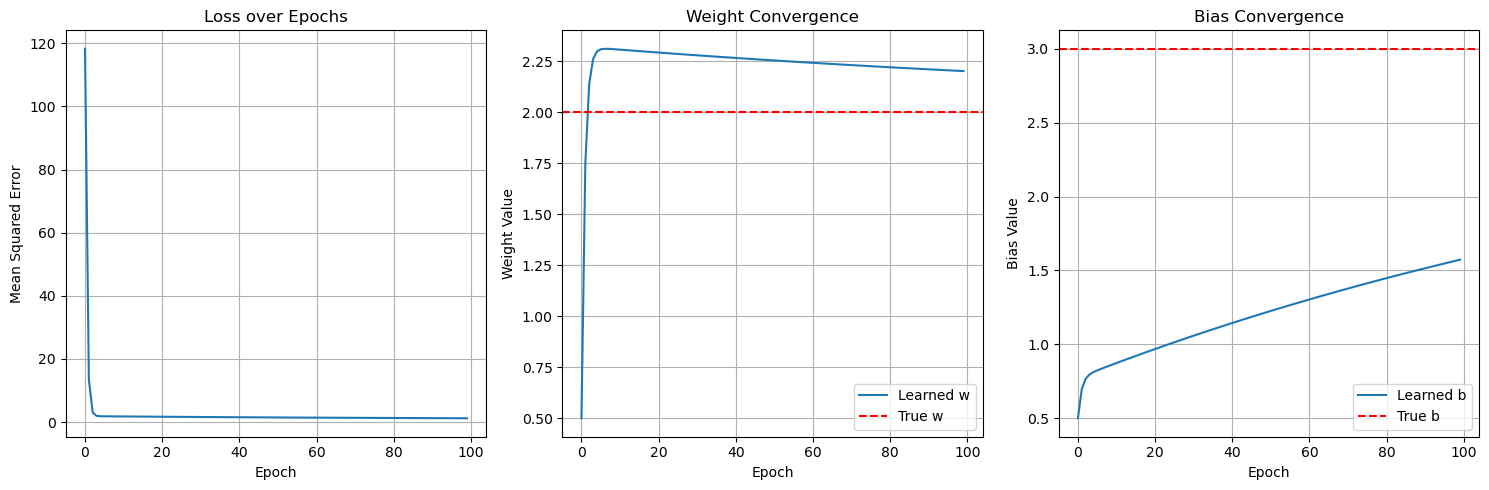

In [9]:
#This cell creates visualizations to show how loss, weight, and bias change during training
plt.figure(figsize=(15, 5))

# Plot 1: Loss over epochs
plt.subplot(1, 3, 1)
plt.plot(loss_history)
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.grid(True)

# Plot 2: Weight convergence
plt.subplot(1, 3, 2)
plt.plot(w_history, label='Learned w')
plt.axhline(y=2, color='r', linestyle='--', label='True w')
plt.title('Weight Convergence')
plt.xlabel('Epoch')
plt.ylabel('Weight Value')
plt.legend()
plt.grid(True)

# Plot 3: Bias convergence
plt.subplot(1, 3, 3)
plt.plot(b_history, label='Learned b')
plt.axhline(y=3, color='r', linestyle='--', label='True b')
plt.title('Bias Convergence')
plt.xlabel('Epoch')
plt.ylabel('Bias Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Step 7: Visualize the final fitted line

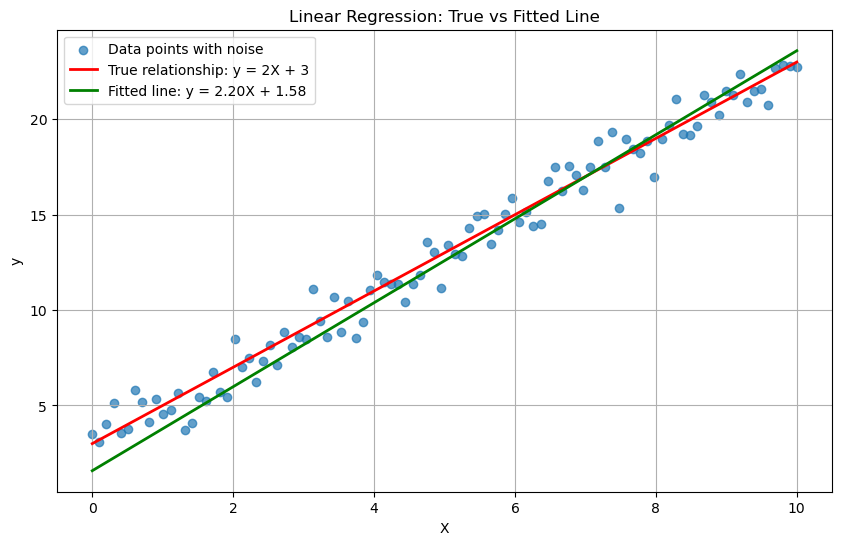

In [11]:
#This cell shows the final fitted line compared to the true relationship and data points
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7, label='Data points with noise')
plt.plot(X, y_true, 'r-', linewidth=2, label='True relationship: y = 2X + 3')
plt.plot(X, w * X + b, 'g-', linewidth=2, label=f'Fitted line: y = {w:.2f}X + {b:.2f}')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression: True vs Fitted Line')
plt.legend()
plt.grid(True)
plt.show()

# Task 2: Binary Classification with Gradient Descent

Step1: Import necessary libraries

In [13]:
#This cell imports all the required libraries for numerical operations, data visualization, and plotting
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Step 2: Generate binary classification dataset

In [14]:
# This cell creates a synthetic binary classification dataset
np.random.seed(42)
X_class = np.linspace(-5, 5, 200)  # Input features
# Create a simple binary classification: points above y=0.5*X are class 1, below are class 0
y_class = ((0.8 * X_class + np.random.normal(0, 1, 200)) > 0).astype(int)

Step 3: Define helper functions

In [17]:
#This cell defines the sigmoid activation function and binary cross-entropy loss function
def sigmoid(x):
    """Sigmoid activation function"""
    return 1 / (1 + np.exp(-x))

def binary_cross_entropy(y_true, y_pred):
    """Binary cross-entropy loss function"""
    # Avoid log(0) by clipping values
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

Step 4: Initialize parameters for classification

In [19]:
# This cell initializes parameters and hyperparameters for the classification task
w_class = 0.1  # Initial weight
b_class = 0.1  # Initial bias
learning_rate_class = 0.01
epochs_class = 1000

Step 5: Implement gradient descent for binary classification

In [21]:
#This cell implements gradient descent for binary classification using sigmoid activation and cross-entropy loss
loss_history_class = []
accuracy_history = []
w_class_history = []
b_class_history = []

n_class = len(X_class)

for epoch in range(epochs_class):
    # Forward pass
    z = w_class * X_class + b_class
    y_pred_class = sigmoid(z)
    
    # Compute loss and accuracy
    loss = binary_cross_entropy(y_class, y_pred_class)
    predictions = (y_pred_class > 0.5).astype(int)
    accuracy = np.mean(predictions == y_class)
    
    loss_history_class.append(loss)
    accuracy_history.append(accuracy)
    w_class_history.append(w_class)
    b_class_history.append(b_class)
    
    # Compute gradients
    dw = (1/n_class) * np.sum((y_pred_class - y_class) * X_class)
    db = (1/n_class) * np.sum(y_pred_class - y_class)
    
    # Update parameters
    w_class = w_class - learning_rate_class * dw
    b_class = b_class - learning_rate_class * db
    
    # Print progress every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: loss = {loss:.4f}, accuracy = {accuracy:.4f}")

Epoch 0: loss = 0.1961, accuracy = 0.9150
Epoch 100: loss = 0.1952, accuracy = 0.9150
Epoch 200: loss = 0.1945, accuracy = 0.9150
Epoch 300: loss = 0.1940, accuracy = 0.9150
Epoch 400: loss = 0.1935, accuracy = 0.9150
Epoch 500: loss = 0.1931, accuracy = 0.9150
Epoch 600: loss = 0.1928, accuracy = 0.9150
Epoch 700: loss = 0.1925, accuracy = 0.9150
Epoch 800: loss = 0.1923, accuracy = 0.9150
Epoch 900: loss = 0.1921, accuracy = 0.9150


Step 6: Print final classification results

In [22]:
# This cell displays the final results of the classification model
final_predictions = (sigmoid(w_class * X_class + b_class) > 0.5).astype(int)
final_accuracy = np.mean(final_predictions == y_class)

print(f"\nFinal parameters after {epochs_class} epochs:")
print(f"w = {w_class:.4f}, b = {b_class:.4f}")
print(f"Final loss: {loss_history_class[-1]:.4f}")
print(f"Final accuracy: {final_accuracy:.4f}")


Final parameters after 1000 epochs:
w = 1.5548, b = -0.0354
Final loss: 0.1920
Final accuracy: 0.9150


Step 7: Visualize classification training progress

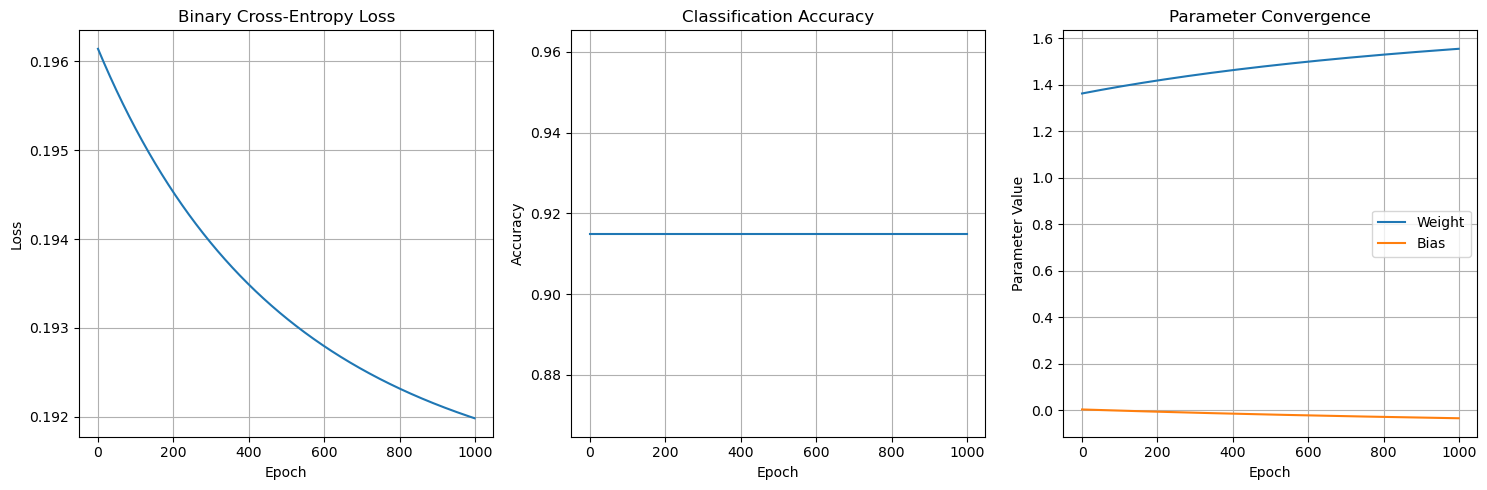

In [23]:
# This cell visualizes the training progress for the classification task
plt.figure(figsize=(15, 5))

# Plot 1: Loss over epochs
plt.subplot(1, 3, 1)
plt.plot(loss_history_class)
plt.title('Binary Cross-Entropy Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

# Plot 2: Accuracy over epochs
plt.subplot(1, 3, 2)
plt.plot(accuracy_history)
plt.title('Classification Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

# Plot 3: Parameter convergence
plt.subplot(1, 3, 3)
plt.plot(w_class_history, label='Weight')
plt.plot(b_class_history, label='Bias')
plt.title('Parameter Convergence')
plt.xlabel('Epoch')
plt.ylabel('Parameter Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

 Step 8: Visualize the final decision boundary

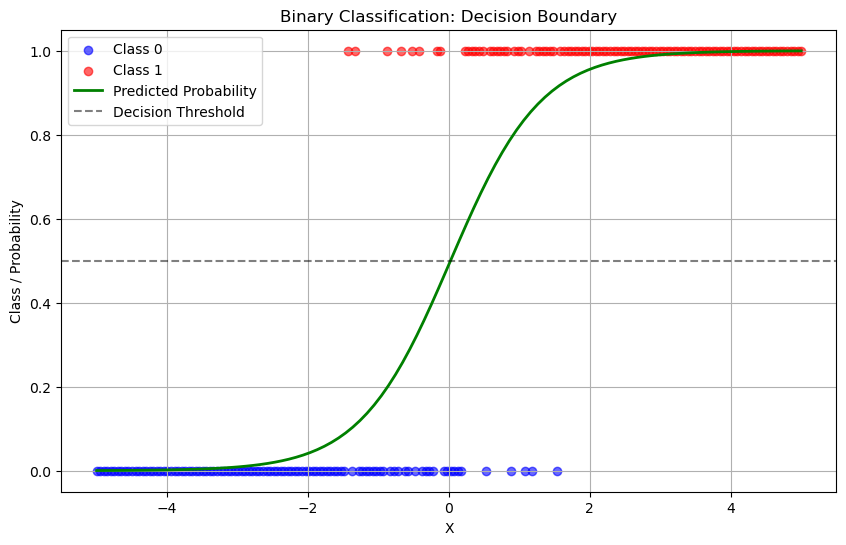

In [24]:
# This cell visualizes the decision boundary and classification results
plt.figure(figsize=(10, 6))

# Plot data points
plt.scatter(X_class[y_class == 0], y_class[y_class == 0], 
            color='blue', alpha=0.6, label='Class 0')
plt.scatter(X_class[y_class == 1], y_class[y_class == 1], 
            color='red', alpha=0.6, label='Class 1')

# Plot decision boundary and probability curve
X_test = np.linspace(-5, 5, 100)
y_prob = sigmoid(w_class * X_test + b_class)
plt.plot(X_test, y_prob, 'green', linewidth=2, label='Predicted Probability')
plt.axhline(y=0.5, color='black', linestyle='--', alpha=0.5, label='Decision Threshold')

plt.xlabel('X')
plt.ylabel('Class / Probability')
plt.title('Binary Classification: Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()